#Import các thư viện và xử lý các dữ liệu không cần thiết



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
df = pd.read_csv('https://raw.githubusercontent.com/nchn471/PE1/main/Data_final.csv')
column_list = df.columns
column_list

Index(['datetime', 'title', 'link', 'house_type', 'price', 'acreage',
       'address', 'district', 'city', 'bedrooms', 'wc', 'house_direction',
       'balcony_direction', 'description', 'price 2', 'price 3', 'wc 2',
       'bedrooms 2', 'floors', 'floors 2', 'property age', 'latitude',
       'longitude', 'hospital', 'supermarket', 'school', 'park',
       'hospital_distance', 'supermarket_distance', 'school_distance',
       'park_distance', 'amenities_rating'],
      dtype='object')

* `datetime`: Thời gian cập nhật thông tin.
* `title`: Tiêu đề liên quan đến bất động sản.
* `link`: Đường dẫn đến bài đăng hoặc thông tin chi tiết về bất động sản.
* `house_type`: Loại hình nhà (ví dụ: căn hộ, nhà phố, biệt thự).
* `price`: Giá bán hoặc giá thuê của bất động sản.
* `acreage`: Diện tích của bất động sản.
* `address`: Địa chỉ của bất động sản.
* `district`: Quận/huyện.
* `city`: Thành phố.
* `bedrooms`: Số lượng phòng ngủ.
* `wc`: Số lượng phòng vệ sinh.
* `house_direction`: Hướng nhà.
* `balcony_direction`: Hướng ban công.
* `description`: Mô tả chi tiết về bất động sản.
* `floors`: Số tầng của bất động sản.
* `property age`: Tuổi của bất động sản.
* 'latitude': Vĩ độ địa điểm.
* 'longitude': Kinh độ địa điểm.
* 'hospital': Có bệnh viện gần không.
* 'supermarket': Có siêu thị gần không.
* 'school': Có trường học gần không.
* 'park': Có công viên gần không.
* 'hospital_distance', 'supermarket_distance', 'school_distance', 'park_distance': Khoảng cách đến bệnh viện, siêu thị, trường học, công viên gần nhất.
* 'amenities_rating': Đánh giá về tiện nghi xung quanh.






In [ ]:
# Tìm hàng có latitude = 13.7989967 và longitude = 100.5491731
row_index = df[(df['latitude'] == 13.7989967) & (df['longitude'] == 100.5491731)].index #coordiate wrong thailand

# Chỉnh sửa giá trị longitude và latitude
df.loc[row_index, 'longitude'] = 105.8300542
df.loc[row_index, 'latitude'] = 21.015036

In [ ]:
df.drop(columns = ['price 2', 'price 3', 'wc 2','bedrooms 2','floors 2','title','link','house_direction','balcony_direction','description'], inplace=True)

Biểu đồ xem NAN trong dataframe

<function matplotlib.pyplot.show(close=None, block=None)>

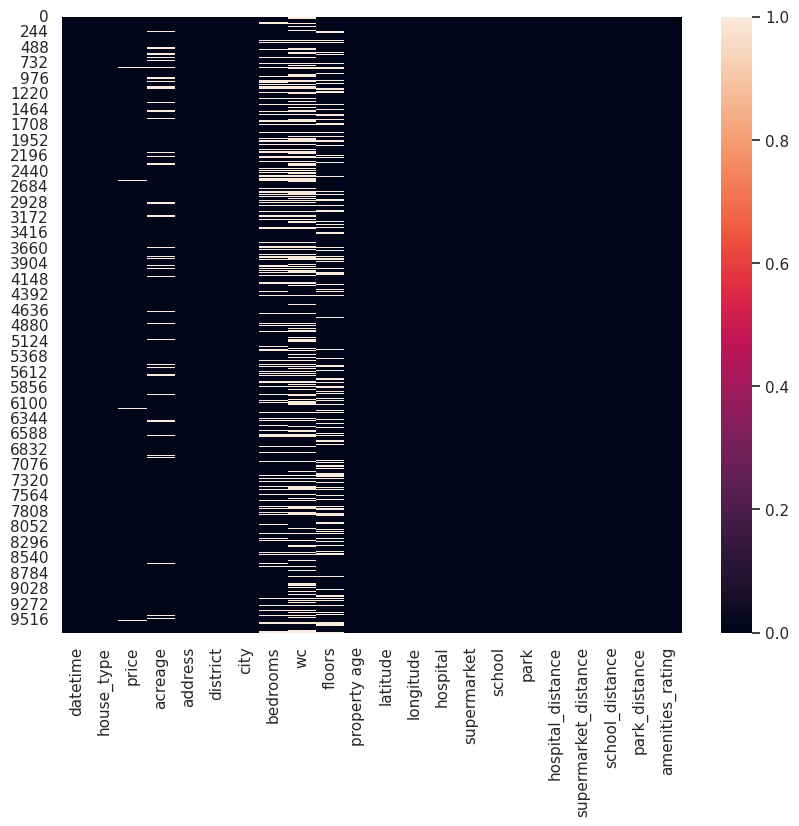

In [ ]:

plt.figure(figsize=(10,8))
sns.heatmap(df.isna())
plt.show

Hàm đếm số hàng có giá trị null trong các cột quan tâm

In [ ]:

def count_null_rows(df):
    columns_of_interest = ["price", "acreage", "bedrooms", "wc", "floors"]
    return df[columns_of_interest].isnull().sum(axis=1)

Đếm số hàng có giá trị null và lọc ra các hàng có số giá trị null lớn hơn hoặc bằng 2

In [ ]:

null_row_count = count_null_rows(df)
nan_rows = df[null_row_count >= 2]
nan_rows.shape

(2263, 22)

Xóa các hàng trên

In [ ]:

df.drop(index=nan_rows.index,inplace=True)
df=df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7458 entries, 0 to 7457
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              7458 non-null   object 
 1   house_type            7458 non-null   object 
 2   price                 7439 non-null   float64
 3   acreage               7201 non-null   float64
 4   address               7458 non-null   object 
 5   district              7458 non-null   object 
 6   city                  7458 non-null   object 
 7   bedrooms              7365 non-null   float64
 8   wc                    6545 non-null   float64
 9   floors                6461 non-null   float64
 10  property age          7458 non-null   int64  
 11  latitude              7458 non-null   float64
 12  longitude             7458 non-null   float64
 13  hospital              7458 non-null   bool   
 14  supermarket           7458 non-null   bool   
 15  school               

#Xử lý NaN

Tính và thay các giá trị null bằng Median của từng cột

In [ ]:
import numpy as np

# Calculate median of 'price' column
median_price = np.nanmedian(df['price'].astype(float))
print("Median of price:", median_price)
# Replace NaN values with the median
df['price'].fillna(median_price, inplace=True)

# Calculate median of 'acreage' column
median_acreage = np.nanmedian(df['acreage'].astype(float))
print("Median of acreage:", median_acreage)
# Replace NaN values with the median
df['acreage'].fillna(median_acreage, inplace=True)

# Calculate median of 'bedrooms' column
median_bedrooms = np.nanmedian(df['bedrooms'].astype(float))
print("Median of bedrooms:", median_bedrooms)
# Replace NaN values with the median
df['bedrooms'].fillna(median_bedrooms, inplace=True)

# Calculate median of 'wc' column
median_wc = np.nanmedian(df['wc'].astype(float))
print("Median of wc:", median_wc)
# Replace NaN values with the median
df['wc'].fillna(median_wc, inplace=True)

# Calculate median of 'floors' column
median_floors = np.nanmedian(df['floors'].astype(float))
print("Median of floors:", median_floors)
# Replace NaN values with the median
df['floors'].fillna(median_floors, inplace=True)


Median of price: 5.5
Median of acreage: 56.0
Median of bedrooms: 3.0
Median of wc: 3.0
Median of floors: 3.0


# Xử lý giá trị Outliers



Chọn cột

In [ ]:
outliers_filter = df[['price', 'acreage', 'bedrooms', 'wc', 'floors']].copy()

 Tính IQR  của dữ liệu được lưu trong biến outliers_filter sử dụng để xác định giá trị ngoại lai (outliers).

In [ ]:

Q1 = outliers_filter.quantile(0.25)
Q3 = outliers_filter.quantile(0.75)
IQR = Q3 - Q1

 Xác định ngưỡng dưới (lower_outlier) và ngưỡng trên (upper_outlier) cho mỗi cột cho giá trị ngoại lai (outliers)  của dữ liệu.


In [ ]:
lower_outlier = {
    'price' : 0.5,
    'acreage' : 1.5,
    'bedrooms' : 1.5,
    'wc' : 1.5,
    'floors' : 1.5
}

upper_outlier = {
    'price' : 25,
    'acreage' : 120,
    'bedrooms' : 11,
    'wc' : 11,
    'floors' : 11
}

 Xử lý giá trị ngoại lai trong DataFrame df dựa trên ngưỡng dưới (lower_outlier) và ngưỡng trên (upper_outlier) được tính từ IQR.

In [ ]:
for index, value in IQR.items():
    print(index, value)
    lower = Q1[index] - lower_outlier[index]*IQR[index]
    upper = Q3[index] + upper_outlier[index]*IQR[index]
    # Select only the records that fall within the valid range, automatically ignores outliers
    df = df[(df[index] >= lower) & (df[index] <= upper )]
    print(df.shape)
df.reset_index(drop=True, inplace=True)


price 4.8999999999999995
(6760, 22)
acreage 36.0
(6759, 22)
bedrooms 2.0
(6742, 22)
wc 2.0
(6740, 22)
floors 2.0
(6732, 22)


Vẽ biểu đồ boxplot cho các cột 'price', 'acreage', 'bedrooms', 'wc', 'floors' trong DataFrame df giúp hiển thị phân phối và các thông số thống kê cơ bản của các biến số.

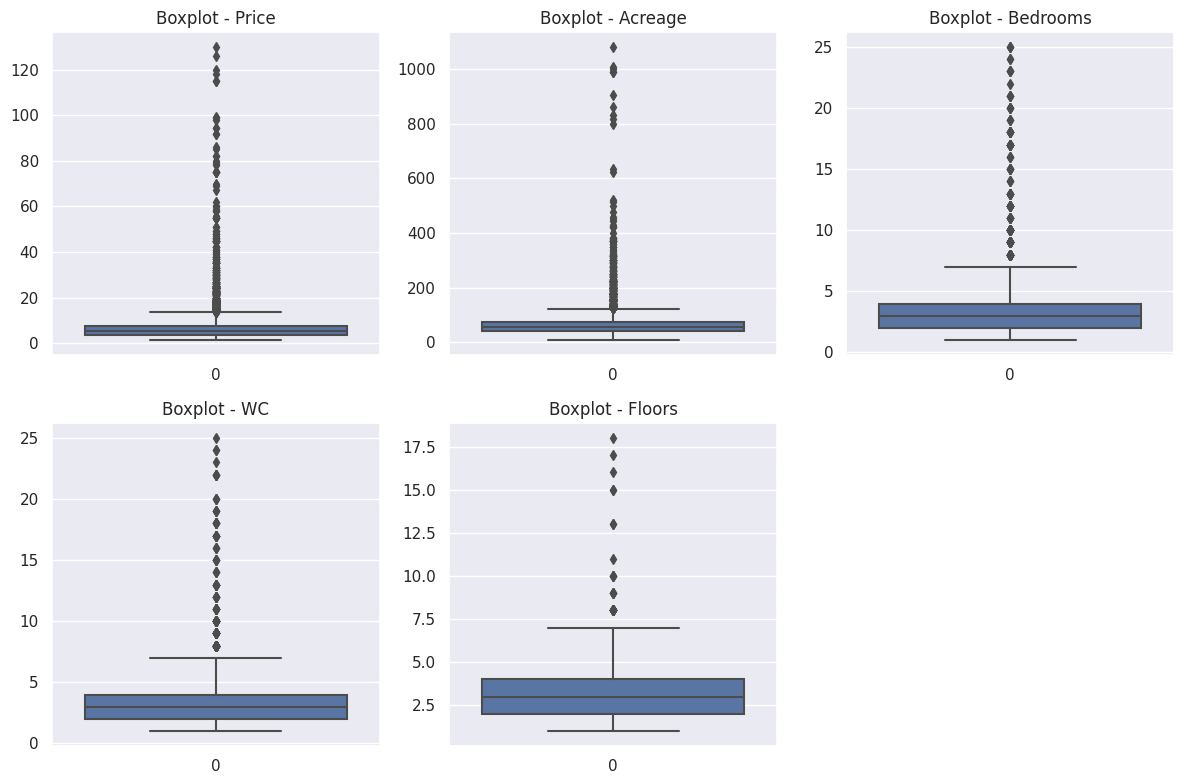

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Boxplot for 'price'
plt.subplot(231)
sns.boxplot(data=df['price'])
plt.title('Boxplot - Price')

# Boxplot for 'acreage'
plt.subplot(232)
sns.boxplot(data=df['acreage'])
plt.title('Boxplot - Acreage')

# Boxplot for 'bedrooms'
plt.subplot(233)
sns.boxplot(data=df['bedrooms'])
plt.title('Boxplot - Bedrooms')

# Boxplot for 'wc'
plt.subplot(234)
sns.boxplot(data=df['wc'])
plt.title('Boxplot - WC')

# Boxplot for 'floors'
plt.subplot(235)
sns.boxplot(data=df['floors'])
plt.title('Boxplot - Floors')

plt.tight_layout()
plt.show()


#Mã hóa

In [ ]:
#mã hóa đặc trưng số bằng pp one hot encoding
from sklearn.preprocessing import OneHotEncoder
# Chọn các cột dữ liệu phân loại cần mã hóa
cat_columns = ['house_type']
df_columns = df[cat_columns].columns.tolist()

# Tạo một đối tượng OneHotEncoder để xử lý các giá trị không xác định trong quá trình mã hóa.
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df[cat_columns])

# Tạo danh sách feature_names để lưu trữ tên các biến được mã hóa.
feature_names = []
for i, col in enumerate(df_columns):
    for category in encoder.categories_[i]:
        feature_names.append(col + '_' + category)

#  biến đổi dữ liệu trong cột 'house_type' thành dạng mã hóa.
encoded_data = encoder.transform(df[cat_columns])

# Tạo một DataFrame mới
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)
#  kết hợp DataFrame gốc (df) với DataFrame đã mã hóa
final_df = pd.concat([df, encoded_df], axis=1)

# Loại bỏ các cột phân loại gốc
final_df.drop(cat_columns, axis=1, inplace=True)

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                6732 non-null   object 
 1   price                   6732 non-null   float64
 2   acreage                 6732 non-null   float64
 3   address                 6732 non-null   object 
 4   district                6732 non-null   object 
 5   city                    6732 non-null   object 
 6   bedrooms                6732 non-null   float64
 7   wc                      6732 non-null   float64
 8   floors                  6732 non-null   float64
 9   property age            6732 non-null   int64  
 10  latitude                6732 non-null   float64
 11  longitude               6732 non-null   float64
 12  hospital                6732 non-null   bool   
 13  supermarket             6732 non-null   bool   
 14  school                  6732 non-null   

# Chuẩn hóa dữ liệu

In [ ]:
# Chọn các cột số cần chuẩn hóa
numerical_columns = ['price', 'acreage', 'bedrooms', 'wc', 'floors','hospital_distance','supermarket_distance','school_distance','park_distance'
]
# Khởi tạo scaler
scaler = StandardScaler()

# Chuẩn hóa các cột số
final_df[numerical_columns] = scaler.fit_transform(final_df[numerical_columns])

#Xuất file


In [ ]:
# Xuất DataFrame thành file CSV
final_df.to_csv('mydata.csv',date_format='%Y-%m-%d',encoding='utf-8-sig', index=False)


#Các biểu đồ thể hiện các thông số

Vẽ biểu đồ violin plot cho cột 'price' trong DataFrame final_df thể hiện phân phối của dữ liệu và các thông số thống kê cơ bản

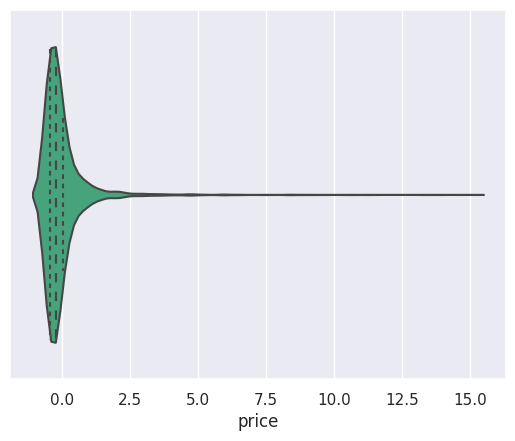

In [ ]:
sns.violinplot(x=final_df['price'], inner="quartile", color="#36B37E");


Biểu đồ này dùng để trực quan hóa phân phối dữ liệu, và ở đây ta có thể thấy được sự phân bố dữ liệu về giá nhà tập trung ở khoảng 0 đến 2.5 cho thấy mức độ phổ biến của giá bán nhà

 Vẽ biểu đồ histogram cho cột 'price' trong DataFrame final_df thể hiện phân bố tần suất của dữ liệu.

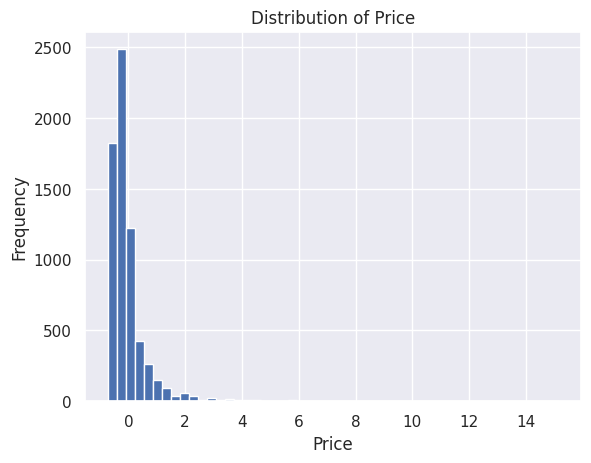

In [ ]:

plt.hist(final_df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

Ta có thể nhìn trực quan hơn bằng biểu đồ histogram dưới đây có thể thấy được tần số giá nhà ở cao nhất với 2500 lượt rao bán

Vẽ ma trận pair plot thể hiện sự tương quan giữa các cặp biến trong dữ liệu.

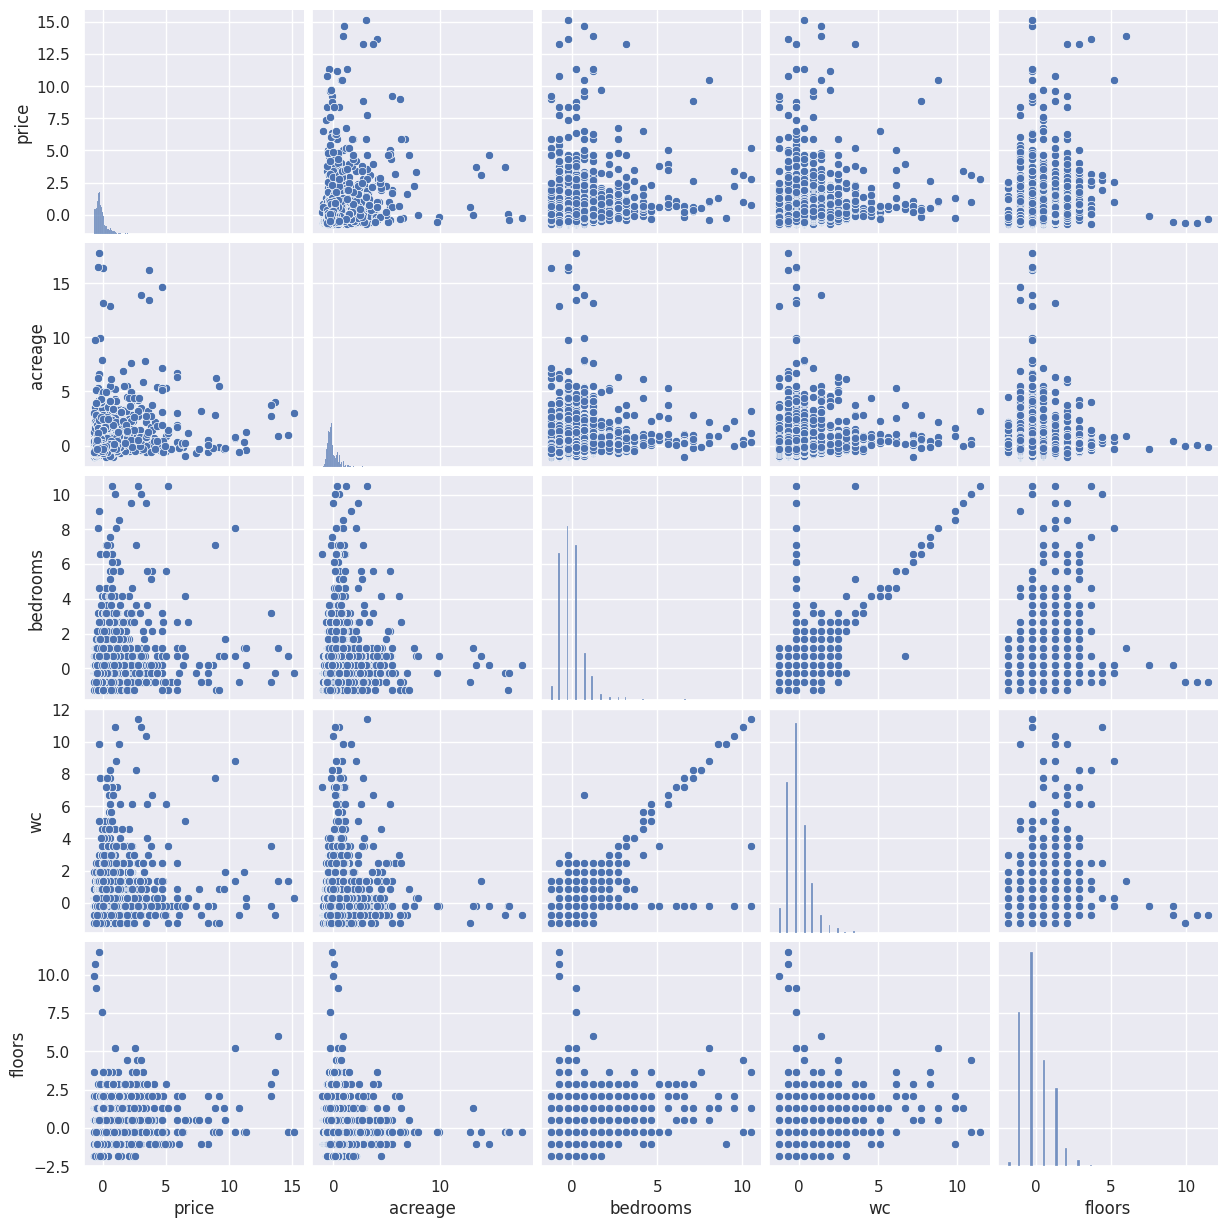

In [ ]:
sns.pairplot(data=final_df[['price','acreage','bedrooms','wc','floors']])

Nhìn vào biểu đồ pairplot này giúp ta thấy sự tương quan về mối quan hệ giữa các dữ liệu với nhau và từ đó có thể thấy được mức độ tìm kiếm nhà ở của người mua hiện nay và sự phổ biến cũng như đa dạng về các loại nhà ở

Vẽ biểu đồ KDE (Kernel Density Estimation) thể hiện mật độ phân bố của dữ liệu trên một bản đồ.

<ipython-input-126-e75a09443a2e>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=final_df, x='longitude', y='latitude', cmap='viridis', shade=True, thresh=0.05)


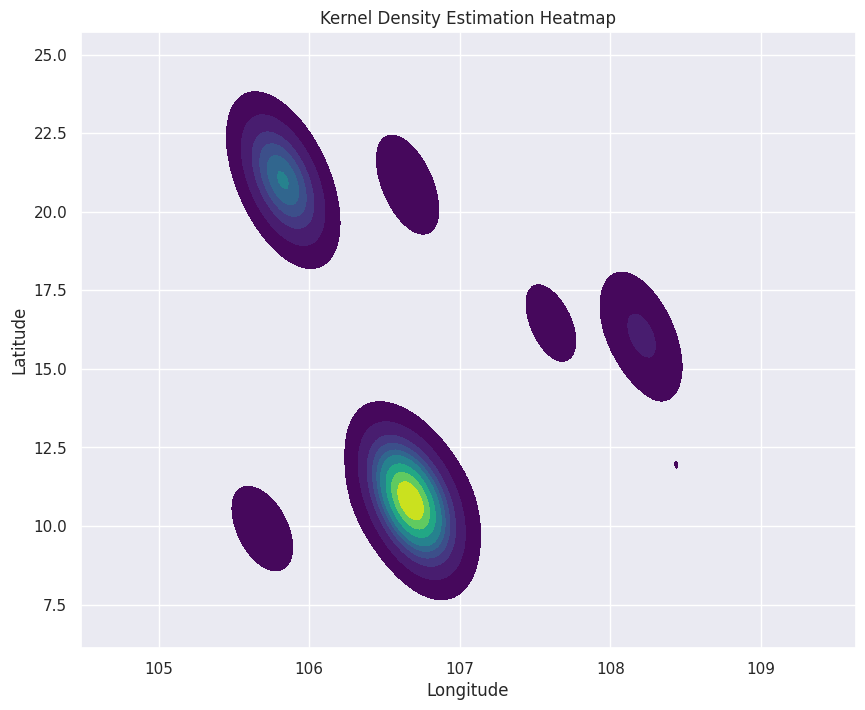

In [ ]:

# Create a KDE plot with a heatmap
sns.set(style="darkgrid")

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a kernel density estimate plot with a 2D KDE
sns.kdeplot(data=final_df, x='longitude', y='latitude', cmap='viridis', shade=True, thresh=0.05)

# Add a title and axis labels
plt.title('Kernel Density Estimation Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()


####Dưới đây là biểu đồ ước lượng mật độ nhân, như có thể thấy trên hình có thể mức độ phân bố của mua bán nhà ở tập trung không đều và có ba nhóm chính.
####Có hai nhân chính đặc trưng với màu sắc khác với những nhân còn lại, cho chung ta biết được nơi bán nhà tập trung nhiều nhất ở hai vị trí của nhân này

Cài đặt gói geopandas và kết nối với Google Drive

In [ ]:
!pip install geopandas
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Vẽ biểu đồ các tỉnh của Việt Nam và điểm dữ liệu từ DataFrame final_df trên cùng một bản đồ.

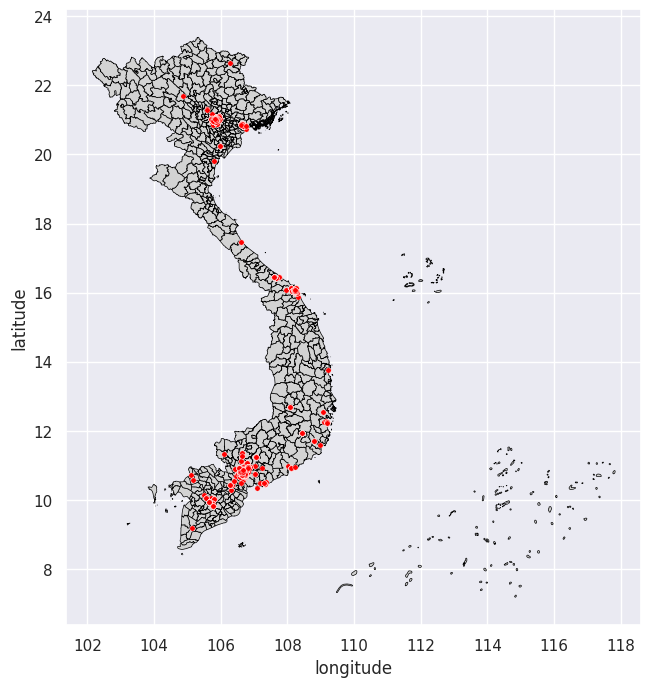

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys


# Đọc dữ liệu về biên địa giới các tỉnh của Việt Nam
path = '/content/drive/My Drive/vnm_adm_gov_20201027/vnm_admbnda_adm2_gov_20201027.shp'
vn_provinces = gpd.read_file(path)

# Thiết lập màu sắc cho bản đồ và scatter plot
map_color = 'lightgrey'  # Màu sắc cho bản đồ
scatter_color = 'red'
# Vẽ biểu đồ các tỉnh với màu sắc tùy chọn
fig, ax = plt.subplots(figsize=(10, 8))
vn_provinces.plot(ax=ax, edgecolor='black', linewidth=0.5, facecolor=map_color)

# Vẽ điểm dữ liệu từ DataFrame data
sns.scatterplot(x='longitude', y='latitude', data=final_df, s=15, ax=ax, color = scatter_color)

# Hiển thị biểu đồ
plt.show()


Như đã nói về sự ước lượng mật độ nhân của biểu đồ bên trên nhóm chúng em đã ánh xạ vào bản đồ để thấy rõ sự phân bố của ba nhóm vùng và thu được kết quả có thể thấy được trên bản đồ. Sự phân bố rõ nhất ở hai miền Nam và Bắc của người bán tập trung ở thành phố Hồ Chí Minh và Thủ đô Hà Nội và điểm phân bố thứ ba tập trung ở miền Trung đặc biệt là Đà Nẵng. Các tỉnh đồng bằng Sông Cửu Long cũng có tập trung một số vị trí buôn bán nhà đất

Tạo heatmap của ma trận tương quan giữa các biến trong DataFrame final_df.

<ipython-input-129-0cead68b878b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=final_df.corr(), linewidths=0.5, center=0, annot=True, ax=ax)


<Axes: >

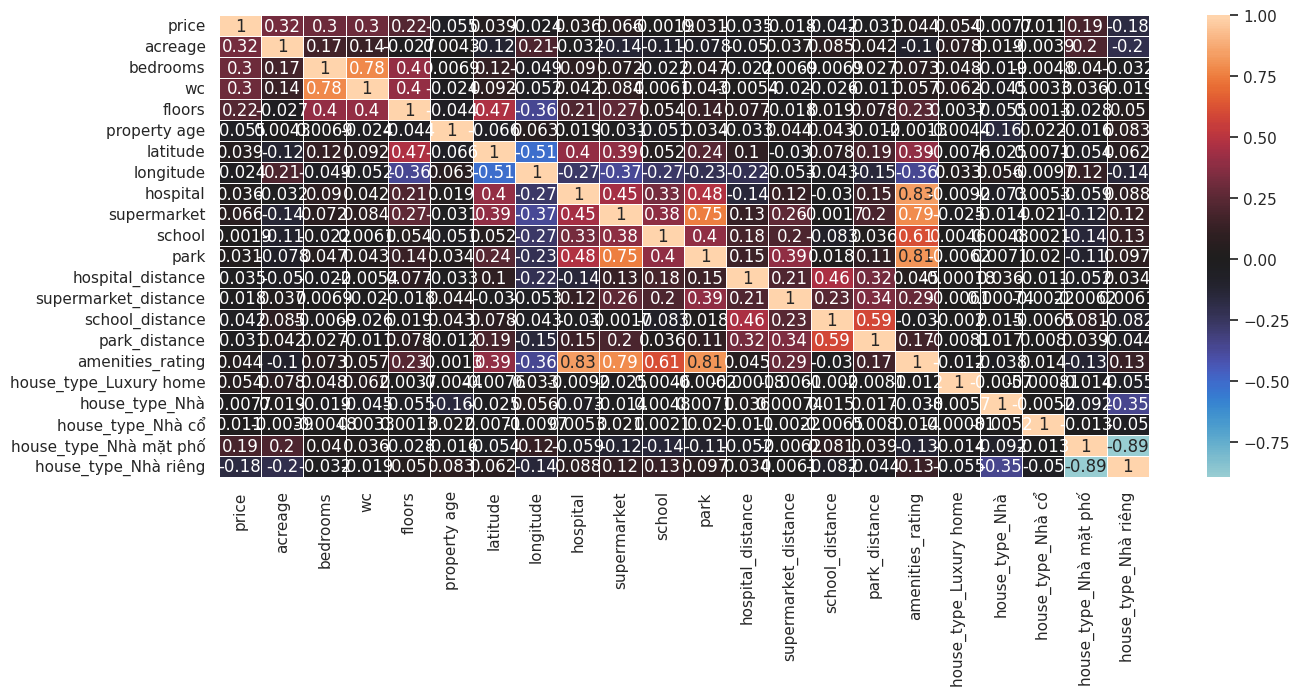

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(data=final_df.corr(), linewidths=0.5, center=0, annot=True, ax=ax)

Biểu đồ heatmap cho thấy mối tương quan dựa trên màu sác thể hiện nếu màu sác càng nhạt thì thể hiện mối tương quan càng cao và có thể thấy được ba điểm tương quan

Ta thấy những feature có sự tương quan cao với price: acreage, bedrooms, wc, floors

Chia dữ liệu trong DataFrame final_df thành hai tập train và test.

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(final_df, test_size=0.2, random_state=42)